Project setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from importlib import reload
import src.modules.data_cleaning as dc

# Reload the data_cleaning module to ensure that any changes made to it are reflected in this notebook
reload(dc)

<module 'src.modules.data_cleaning' from '/Users/ds/data_science/demand_prediction_data/src/modules/data_cleaning.py'>

In [3]:
import os

global DATA_FOLDER, SRC_FOLDER, MODULES_FOLDER, TESTS_FOLDER, OUTPUT_FOLDER, FIGURES_FOLDER

# Define folder paths as global variables
DATA_FOLDER = "data/"
SRC_FOLDER = "src/"
MODULES_FOLDER = "src/modules/"
TESTS_FOLDER = "src/tests/"
OUTPUT_FOLDER = "output/"
FIGURES_FOLDER = "output/figures/"

# folders = [
#     DATA_FOLDER,
#     SRC_FOLDER,
#     MODULES_FOLDER,
#     TESTS_FOLDER,
#     OUTPUT_FOLDER,
#     FIGURES_FOLDER,
# ]

# for folder in folders:
#     if not os.path.exists(folder):
#         os.makedirs(folder)
#         print(f"Created folder: {folder}")
#     else:
#         print(f"Folder already exists: {folder}")


In [4]:
global DATA_PATH, DATA_ORIGINAL_PATH, DATA_GENERATED_PATH, IMAGE_GENERATED_PATH

DATA_PATH = DATA_FOLDER
DATA_ORIGINAL_PATH = DATA_FOLDER
DATA_GENERATED_PATH = OUTPUT_FOLDER
IMAGE_GENERATED_PATH = FIGURES_FOLDER


global COLORS

COLORS = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

In [5]:
global LSTM1_OUT_PATH
LSTM1_OUT_PATH = DATA_GENERATED_PATH + 'LSTM_1/'

# EDA

## Accessing the Database

In [6]:
# read the parquet file
import pandas as pd
df = pd.read_parquet(DATA_GENERATED_PATH + 'ETL_finished.parquet')

In [7]:
# min max in the df.index
df.index.min()
df.index.max()

Timestamp('2019-06-01 00:00:00')

Timestamp('2022-01-14 00:00:00')

In [8]:


# # Check pairing for all combinations
# dc.check_all_column_pairings(df)



Output:

* brand_id and brand_name are paired 1-to-1
* group0_id and group0 are paired 1-to-1
* group1_id and group1 are paired 1-to-1
* group2_id and group2 are paired 1-to-1

In [9]:

dc.print_df_with_dtypes(df, max_rows=200, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA')

+---------------------+------------+---------------+-------------+------------+-----------------+-----------------------+-------------+---------------------+--------------+-----------+----------+-----------------+---------------------+----------------------------------------+------------------+------------+------------------+-------------+-----------+-------------+-----------------+-------------+-------------------------+-------------+-------------+-------------+-------------+-------------+
| date                |   order_id | payment       | item_code   |   quantity |   gift_quantity |   unit_price_vat_excl |   unit_cogs |   unit_rrp_vat_excl | department   | channel   | owner    | site            | CreatedAt           | item_name                              | style            |   brand_id | brand_name       |   group0_id | group0    |   group1_id | group1          |   group2_id | group2                  | category    | gender      | age         | color       | size        |
|       

### A customized plot function to plot in Tableau style

In [10]:

reload(dc)


dc.plot_seasonality_boxplot(df, x='date', y='quantity', hue='group0', cycle='week_of_year', measure='sum')



<module 'src.modules.data_cleaning' from '/Users/ds/data_science/demand_prediction_data/src/modules/data_cleaning.py'>

## EAD on Weather Data

In [11]:
# feature enginnering:
df_FE = df.copy()

In [12]:
# please use the characters after the last dot in the site value as the country abbreviation
df_FE['country'] = df_FE['site'].str.split('.').str[-1]
df_FE['country'].unique()

array(['cz', 'de', 'sk', 'hu', 'ro', 'com', 'es', 'at', 'other', 'fr',
       'it', 'hr', 'nl', 'ie', 'be', 'dk', 'se', 'pt', 'pl', 'fi', 'si',
       'uk', 'bg'], dtype=object)

```python
Date Range:

Timestamp('2019-06-01 00:00:00')

Timestamp('2022-01-14 00:00:00')



country_mapping = {
    'cz': 'Czech Republic',
    'de': 'Germany',
    'sk': 'Slovakia',
    'hu': 'Hungary',
    'ro': 'Romania',
    'com': 'Commercial',  # Note: .com is not country-specific
    'es': 'Spain',
    'at': 'Austria',
    'other': 'Other',
    'fr': 'France',
    'it': 'Italy',
    'hr': 'Croatia',
    'nl': 'Netherlands',
    'ie': 'Ireland',
    'be': 'Belgium',
    'dk': 'Denmark',
    'se': 'Sweden',
    'pt': 'Portugal',
    'pl': 'Poland',
    'fi': 'Finland',
    'si': 'Slovenia',
    'uk': 'United Kingdom',
    'bg': 'Bulgaria'
}
capital_city_mapping = {
    'cz': 'Prague',
    'de': 'Berlin',
    'sk': 'Bratislava',
    'hu': 'Budapest',
    'ro': 'Bucharest',
    'com': 'N/A',  # Note: .com is not country-specific
    'es': 'Madrid',
    'at': 'Vienna',
    'other': 'N/A',
    'fr': 'Paris',
    'it': 'Rome',
    'hr': 'Zagreb',
    'nl': 'Amsterdam',
    'ie': 'Dublin',
    'be': 'Brussels',
    'dk': 'Copenhagen',
    'se': 'Stockholm',
    'pt': 'Lisbon',
    'pl': 'Warsaw',
    'fi': 'Helsinki',
    'si': 'Ljubljana',
    'uk': 'London',
    'bg': 'Sofia'
}

capital_coordinates_mapping = {
    'cz': (50.0755381, 14.4378005),
    'de': (52.5200066, 13.4049540),
    'sk': (48.1485965, 17.1077477),
    'hu': (47.497912, 19.040235),
    'ro': (44.4267674, 26.1025384),
    'com': 'N/A',  # Note: .com is not country-specific
    'es': (40.4167754, -3.7037902),
    'at': (48.2081743, 16.3738189),
    'other': 'N/A',
    'fr': (48.856614, 2.3522219),
    'it': (41.9027835, 12.4963655),
    'hr': (45.8150108, 15.9819190),
    'nl': (52.3702157, 4.8951679),
    'ie': (53.3498053, -6.2603097),
    'be': (50.8503396, 4.3517103),
    'dk': (55.6760968, 12.5683371),
    'se': (59.3293235, 18.0685808),
    'pt': (38.7222524, -9.1393366),
    'pl': (52.2296756, 21.0122287),
    'fi': (60.1698557, 24.9383791),
    'si': (46.0569465, 14.5057515),
    'uk': (51.5073509, -0.1277583),
    'bg': (42.6977082, 23.3218675)
}

```


In [13]:
dc.print_df_with_dtypes(df_FE, max_rows=200, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_FE')

+---------------------+------------+---------------+-------------+------------+-----------------+-----------------------+-------------+---------------------+--------------+-----------+----------+-----------------+---------------------+----------------------------------------+------------------+------------+------------------+-------------+-----------+-------------+-----------------+-------------+-------------------------+-------------+-------------+-------------+-------------+-------------+-----------+
| date                |   order_id | payment       | item_code   |   quantity |   gift_quantity |   unit_price_vat_excl |   unit_cogs |   unit_rrp_vat_excl | department   | channel   | owner    | site            | CreatedAt           | item_name                              | style            |   brand_id | brand_name       |   group0_id | group0    |   group1_id | group1          |   group2_id | group2                  | category    | gender      | age         | color       | size      

In [14]:
# Print the top 10 countries with the most sales
print('Top 10 countries with the most sales:')

# gouping by country, see which countries have the most sales
df_FE.groupby('country')['quantity'].sum().sort_values(ascending=False)


Top 10 countries with the most sales:


country
cz       726336
sk       367676
hu       293089
ro       285730
de       123385
es       120998
fr        74731
it        43002
hr        38192
com       37328
ie        17892
dk        15347
nl        11550
at        10988
se         8472
pt         5445
pl         4490
be         3622
fi         1787
si          712
other        70
uk           14
bg            6
Name: quantity, dtype: int64

In [15]:
# count the number of records from [cz, sk, hu, ro, de, es] is how many percent of the total number of records
df_FE[df_FE['country'].isin(['cz', 'sk'])].shape[0] / df_FE.shape[0] * 100
df_FE[df_FE['country'].isin(['cz', 'sk', 'hu'])].shape[0] / df_FE.shape[0] * 100
df_FE[df_FE['country'].isin(['cz', 'sk', 'hu', 'ro'])].shape[0] / df_FE.shape[0] * 100
df_FE[df_FE['country'].isin(['cz', 'sk', 'hu', 'ro', 'de'])].shape[0] / df_FE.shape[0] * 100
df_FE[df_FE['country'].isin(['cz', 'sk', 'hu', 'ro', 'de', 'es'])].shape[0] / df_FE.shape[0] * 100

49.997344831232304

63.41647379489409

76.40001409824124

82.15599703936934

87.75050812411152

In [16]:
dc.print_df_with_dtypes(df_FE, max_rows=200, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_FE')

+---------------------+------------+---------------+-------------+------------+-----------------+-----------------------+-------------+---------------------+--------------+-----------+----------+-----------------+---------------------+----------------------------------------+------------------+------------+------------------+-------------+-----------+-------------+-----------------+-------------+-------------------------+-------------+-------------+-------------+-------------+-------------+-----------+
| date                |   order_id | payment       | item_code   |   quantity |   gift_quantity |   unit_price_vat_excl |   unit_cogs |   unit_rrp_vat_excl | department   | channel   | owner    | site            | CreatedAt           | item_name                              | style            |   brand_id | brand_name       |   group0_id | group0    |   group1_id | group1          |   group2_id | group2                  | category    | gender      | age         | color       | size      

In [17]:
# # save to csv, continue EDA in Tableau
# df_FE.to_csv(DATA_GENERATED_PATH + 'df_FE.csv')

## Moon Phases





In [19]:
# read from the csv file data/Prague 2019-06-01 to 2022-01-14.csv

weather_Prague = pd.read_csv(DATA_ORIGINAL_PATH + 'Prague 2019-06-01 to 2022-01-14.csv')

# weather_Prague.datetime from object to datetime, the object format is 2019-06-01 
weather_Prague['datetime'] = pd.to_datetime(weather_Prague['datetime'])

# rename the column datetime to date, and set the index to date
weather_Prague.rename(columns={'datetime': 'date'}, inplace=True)
weather_Prague = weather_Prague.set_index('date')

# print weather_Prague
dc.print_df_with_dtypes(weather_Prague[['moonphase']].tail(30), max_rows=20, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_weather_Prague')


+---------------------+-------------+
| date                |   moonphase |
|                     |     float64 |
|                     |      NaN: 0 |
|---------------------+-------------|
| 2021-12-16 00:00:00 |        0.41 |
| 2021-12-17 00:00:00 |        0.44 |
| 2021-12-18 00:00:00 |        0.48 |
| 2021-12-19 00:00:00 |        0.5  |
| 2021-12-20 00:00:00 |        0.54 |
| 2021-12-21 00:00:00 |        0.58 |
| 2021-12-22 00:00:00 |        0.61 |
| 2021-12-23 00:00:00 |        0.65 |
| 2021-12-24 00:00:00 |        0.68 |
| 2021-12-25 00:00:00 |        0.71 |
| 2021-12-26 00:00:00 |        0.75 |
| 2021-12-27 00:00:00 |        0.75 |
| 2021-12-28 00:00:00 |        0.82 |
| 2021-12-29 00:00:00 |        0.85 |
| 2021-12-30 00:00:00 |        0.89 |
| 2021-12-31 00:00:00 |        0.92 |
| 2022-01-01 00:00:00 |        0.95 |
| 2022-01-02 00:00:00 |        0    |
| 2022-01-03 00:00:00 |        0.02 |
| 2022-01-04 00:00:00 |        0.06 |
+---------------------+-------------+


In [20]:


# read moonphase_future from data/prague 2022-01-01 to 2024-12-31.csv
moonphase_future = pd.read_csv(DATA_ORIGINAL_PATH + 'prague 2022-01-01 to 2024-12-31.csv')

# conver the moonphase_future.datetime from timestemp to datetime
# rename the column datetimeEpoch to datetime
moonphase_future = moonphase_future.rename(columns={'datetimeEpoch': 'datetime'})
moonphase_future['datetime'] = pd.to_datetime(moonphase_future['datetime'], unit='s')
moonphase_future['datetime'] = moonphase_future['datetime'] + pd.Timedelta(hours=1)

# rename the column datetime to date, and set the index to date
moonphase_future.rename(columns={'datetime': 'date'}, inplace=True)
moonphase_future = moonphase_future.set_index('date')

# print weather_Prague
dc.print_df_with_dtypes(moonphase_future[['moonphase']].tail(30), max_rows=20, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_moonphase_future')



+---------------------+-------------+
| date                |   moonphase |
|                     |     float64 |
|                     |      NaN: 0 |
|---------------------+-------------|
| 2024-12-02 00:00:00 |        0.04 |
| 2024-12-03 00:00:00 |        0.08 |
| 2024-12-04 00:00:00 |        0.11 |
| 2024-12-05 00:00:00 |        0.15 |
| 2024-12-06 00:00:00 |        0.18 |
| 2024-12-07 00:00:00 |        0.22 |
| 2024-12-08 00:00:00 |        0.25 |
| 2024-12-09 00:00:00 |        0.29 |
| 2024-12-10 00:00:00 |        0.33 |
| 2024-12-11 00:00:00 |        0.36 |
| 2024-12-12 00:00:00 |        0.4  |
| 2024-12-13 00:00:00 |        0.43 |
| 2024-12-14 00:00:00 |        0.47 |
| 2024-12-15 00:00:00 |        0.5  |
| 2024-12-16 00:00:00 |        0.53 |
| 2024-12-17 00:00:00 |        0.57 |
| 2024-12-18 00:00:00 |        0.6  |
| 2024-12-19 00:00:00 |        0.63 |
| 2024-12-20 00:00:00 |        0.66 |
| 2024-12-21 00:00:00 |        0.7  |
+---------------------+-------------+


The t-statistic of -3.342 indicates that the 'quantity' variable's mean for one moon phase group is lower than the other. The p-value of 0.00083 suggests that there is a significant difference between the means, allowing us to reject the null hypothesis.

### Hypotheses

1. **Group Differences:** Test if the `group_other` is different from each of the other groups (group_a, group_b, group_c, group_d, and group_e).

2. **Paired Group Differences:** Test if the difference between the following pairs of groups is not important:
    - group_a and group_b
    - group_b and group_c
    - group_c and group_d
    - group_e and group_a

3. **Mean Comparison:** Test if the mean of group_a, group_b, group_c, group_d, and group_e is much larger than the mean of `group_other`.

4. **Sum Comparison:** Test if the sum of the quantities from group_a, group_b, group_c, group_d, and group_e is much larger than the sum of the quantities from `group_other`.


In the given context, we aim to investigate the potential impact of moon phases on the daily sales quantity of a product. By carrying out these tests, we can gain insights into whether there is a statistically significant relationship between different moon phases and sales performance. This information can be valuable for understanding customer behavior and could potentially help with decision-making in areas such as marketing campaigns, pricing, and inventory management.

Specifically, we want to examine:

- If the sales quantity during specific moon phases (0, 0.25, 0.5, 0.75, and 1.0) is significantly different from the sales quantity during other moon phases.
- If there is a significant difference in sales quantity between specific moon phase pairs (e.g., full moon vs. new moon, first quarter vs. last quarter, etc.).
- If the mean sales quantity during the specific moon phases (0, 0.25, 0.5, 0.75, and 1.0) is much larger than the mean sales quantity during other moon phases.
- If the sum of sales quantity during the specific moon phases (0, 0.25, 0.5, 0.75, and 1.0) is much larger than the sum of sales quantity during other moon phases.

By conducting these hypothesis tests, we can determine if there is any evidence to support the idea that moon phases influence the daily sales quantity. If significant differences are found, this could provide a basis for further investigation and potentially inform business strategies that take into account the effects of moon phases on sales.


| Group   | Moon Phase   | Description                                                                                               |
|---------|--------------|-----------------------------------------------------------------------------------------------------------|
| Group_0 | Other values | Contains all observations with moon phase values not equal to 0, 0.25, 0.5, 0.75, or 1.                    |
| Group_1 | 0            | Contains all observations with moon phase values close to 0 (New Moon).                                   |
| Group_2 | 0.25         | Contains all observations with moon phase values close to 0.25 (First Quarter / Waxing Half Moon).        |
| Group_3 | 0.5          | Contains all observations with moon phase values close to 0.5 (Full Moon).                                |
| Group_4 | 0.75         | Contains all observations with moon phase values close to 0.75 (Last Quarter / Waning Half Moon).         |
| Group_5 | 1            | Contains all observations with moon phase values close to 1 (New Moon, same as Group_1 but a different set). |


In [21]:
# import ttest_ind
from scipy.stats import ttest_ind
import numpy as np

from tabulate import tabulate

def moonphase_ttest_v2(df_FE, weather_Prague, moonphase_values=[0, 0.25, 0.5, 0.75, 1.0], tolerance=2.5e-2):
    # Set the datetime column as the index in weather_Prague
    # weather_Prague = weather_Prague.set_index('date')
    
    # Merge moonphase data to df_FE
    df_FE = df_FE.merge(weather_Prague[['moonphase']], left_index=True, right_index=True, how='left')

    # Create a mask for specific moon phase values
    specific_moonphase_mask = np.zeros(df_FE.shape[0], dtype=bool)
    for value in moonphase_values:
        specific_moonphase_mask |= np.isclose(df_FE['moonphase'], value, atol=tolerance)

    # Create groups based on moon phase values
    groups = {i: df_FE[np.isclose(df_FE['moonphase'], value, atol=tolerance)] for i, value in enumerate(moonphase_values, 1)}
    groups[0] = df_FE[~specific_moonphase_mask]
    
    # Compare the means of all pairs of groups and display the results in a table
    comparisons = []
    for i, group_i in groups.items():
        for j, group_j in groups.items():
            if i < j:
                t_statistic, p_value = ttest_ind(
                    group_i['quantity'],
                    group_j['quantity'],
                    equal_var=False,
                    nan_policy='omit'
                )
                comparisons.append([f"Group_{i}", f"Group_{j}", t_statistic, p_value])
    
    print(tabulate(comparisons, headers=["Group A", "Group B", "t-statistic", "p-value"], tablefmt="grid"))

    # write the result to a txt file, in tabulate format
    with open(DATA_GENERATED_PATH + 'moonphase_test_v2.txt', 'w') as f:
        f.write(tabulate(comparisons, headers=["Group A", "Group B", "t-statistic", "p-value"], tablefmt="grid"))
        

# Example usage
moonphase_ttest_v2(df_FE, weather_Prague)


+-----------+-----------+---------------+-------------+
| Group A   | Group B   |   t-statistic |     p-value |
+===========+===========+===============+=============+
| Group_1   | Group_2   |      2.76067  | 0.00576904  |
+-----------+-----------+---------------+-------------+
| Group_1   | Group_3   |     10.7539   | 5.79286e-27 |
+-----------+-----------+---------------+-------------+
| Group_1   | Group_4   |      2.17868  | 0.0293571   |
+-----------+-----------+---------------+-------------+
| Group_1   | Group_5   |     -2.79066  | 0.00526435  |
+-----------+-----------+---------------+-------------+
| Group_2   | Group_3   |     10.4534   | 1.43283e-25 |
+-----------+-----------+---------------+-------------+
| Group_2   | Group_4   |     -0.714977 | 0.474624    |
+-----------+-----------+---------------+-------------+
| Group_2   | Group_5   |     -4.44735  | 8.74534e-06 |
+-----------+-----------+---------------+-------------+
| Group_3   | Group_4   |    -10.8633   | 1.7524

## Using Week Numbers as Proxy Variables

When working with weather data, one approach to simplifying the analysis is to use the week of the month as proxy variables. This means aggregating the data by week, allowing us to analyze the differences in weather patterns and identify any significant changes over time. However, it's important to carefully consider the implications of this approach, as it may not fully capture the nuances of the actual weather conditions.

### Hypothesis Testing

To test the validity of using the week of the month as proxy variables, we can perform a Kruskal-Wallis test for numerical features and a Chi-square test for categorical features. These tests help us determine whether the means (or distributions, in the case of categorical variables) are significantly different across different weeks of the month.

We can set up the null hypothesis (H0) as follows:

- H0: There is no significant difference in means (or distributions) of the weather features across different weeks of the month.

If the p-value obtained from the test is greater than the significance level (alpha), typically set to 0.05, we fail to reject the null hypothesis, suggesting that there is no significant difference in the means (or distributions) of the weather features across different weeks of the month.

### Results and Interpretation

After performing the hypothesis tests, we can calculate the proportion of weeks with no significant difference in means (or distributions) for each weather feature. Features with a proportion greater than the significance level (e.g., 0.05) can be considered as suitable proxy variables for weather data. However, it's important to note that this is a simplification and may not perfectly represent the actual weather conditions.

Based on the test results, we can decide which features to keep in our analysis and which ones to drop due to their low proportion values (less than or equal to 0.05). This process can help us create a simplified dataset that maintains relevant information while reducing complexity.



In [22]:
dc.print_df_with_dtypes(weather_Prague.head(), max_rows=20, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_weather_Prague')

+---------------------+----------+-----------+--------------------------------------------+------------+-------------+-----------+-----------+-----------+----------------+----------------+-------------+-----------+------------+-----------+--------------+---------------+--------------+-----------+-------------+------------+-------------+-----------+--------------------+--------------+--------------+------------------+---------------+-----------+--------------+---------------------+---------------------+-------------+------------------+--------------------------------------+-------------------+----------+
| date                | name     | address   | resolvedAddress                            |   latitude |   longitude |   tempmax |   tempmin |      temp |   feelslikemax |   feelslikemin |   feelslike |       dew |   humidity |    precip |   precipprob |   precipcover |   preciptype |      snow |   snowdepth |   windgust |   windspeed |   winddir |   sealevelpressure |   cloudcover |   

In [23]:
weather_col = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions']

In [24]:
import pandas as pd
from scipy.stats import kruskal, chi2_contingency

# List the categorical features
categorical_features = ['preciptype', 'conditions']

# Define the function to perform the Kruskal-Wallis and Chi-square tests
def kruskal_wallis_chi_square_test(weather_data, weeks_range=(1, 53), features=weather_col):
    weather_data.index = pd.to_datetime(weather_data.index)
    weather_data['week_of_year'] = weather_data.index.isocalendar().week
    weather_data['year'] = weather_data.index.year

    results = []

    for week in range(weeks_range[0], weeks_range[1] + 1):
        for feature in features:
            data_by_week = weather_data[weather_data['week_of_year'] == week]
            groups = data_by_week.groupby('year')[feature].apply(list)
            
            if len(groups) < 2:  # At least two groups are needed for the test
                continue

            if feature not in categorical_features:
                # Skip the test if all values in the groups are identical
                if all(len(set(group)) == 1 and group[0] == groups.iloc[0][0] for group in groups):
                    continue
                
                # Perform Kruskal-Wallis test for numerical features
                test_statistic, p_value = kruskal(*groups)
            else:
                # Create a contingency table for categorical features
                contingency_table = pd.crosstab(data_by_week['year'], data_by_week[feature])

                # Perform Chi-square test for categorical features
                test_statistic, p_value, _, _ = chi2_contingency(contingency_table)

            results.append((week, feature, test_statistic, p_value))

    results_df = pd.DataFrame(results, columns=['Week', 'Feature', 'Test_statistic', 'p_value'])
    return results_df

# Run the Kruskal-Wallis and Chi-square tests
results_df = kruskal_wallis_chi_square_test(weather_Prague)

# Set a significance level (alpha)
alpha = 0.05

# Calculate the proportion of weeks with no significant difference for each feature
results_df['no_significant_difference'] = results_df['p_value'] > alpha
proportion_no_difference = results_df.groupby('Feature')['no_significant_difference'].mean()

print("Proportion of weeks with no significant difference in means for each feature:")
print(proportion_no_difference)


Proportion of weeks with no significant difference in means for each feature:
Feature
cloudcover          0.679245
conditions          0.754717
dew                 0.641509
feelslike           0.490566
feelslikemax        0.528302
feelslikemin        0.584906
humidity            0.641509
moonphase           0.301887
precip              0.773585
precipcover         0.773585
precipprob          0.735849
preciptype          0.924528
sealevelpressure    0.471698
severerisk          0.000000
snow                0.818182
snowdepth           0.700000
solarenergy         0.849057
solarradiation      0.830189
sunrise             0.000000
sunset              0.000000
temp                0.452830
tempmax             0.528302
tempmin             0.603774
uvindex             0.867925
visibility          0.622642
winddir             0.811321
windgust            0.000000
windspeed           0.641509
Name: no_significant_difference, dtype: float64


In [25]:
def save_results_to_file(proportion_no_difference, filename=DATA_GENERATED_PATH + 'kruskal_wallis_test_all.txt'):
    with open(filename, 'w') as file:
        file.write("Proportion of weeks with no significant difference in means for each feature:\n")
        for feature, proportion in proportion_no_difference.items():
            file.write(f"{feature:<20}{proportion:.6f}\n")


# Save the results to a file
save_results_to_file(proportion_no_difference)

drop not useful columns from the weather_Prague, based on the hypothesis test results

In [26]:
# Find the columns with proportion less than or equal to 0.05
columns_to_drop = proportion_no_difference[proportion_no_difference <= 0.05].index.tolist()

# Drop those columns from the weather_Prague DataFrame
weather_Prague_simplified = weather_Prague.drop(columns_to_drop, axis=1)

# Print the remaining columns
print("Remaining columns in weather_Prague_simplified:")
print(weather_Prague_simplified.columns)


Remaining columns in weather_Prague_simplified:
Index(['name', 'address', 'resolvedAddress', 'latitude', 'longitude',
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'moonphase', 'conditions', 'description',
       'icon', 'source', 'week_of_year', 'year'],
      dtype='object')


In [27]:
# Feature Engineering

In [28]:
dc.print_df_with_dtypes(df_FE, max_rows=20, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_df_FE')

+---------------------+------------+------------+-------------+------------+-----------------+-----------------------+-------------+---------------------+--------------+-----------+----------+-----------------+---------------------+-----------------------+-------------+------------+-----------------+-------------+-----------+-------------+----------------+-------------+--------------------+-------------+-------------+-------------+-------------+-------------+-----------+
| date                |   order_id | payment    | item_code   |   quantity |   gift_quantity |   unit_price_vat_excl |   unit_cogs |   unit_rrp_vat_excl | department   | channel   | owner    | site            | CreatedAt           | item_name             | style       |   brand_id | brand_name      |   group0_id | group0    |   group1_id | group1         |   group2_id | group2             | category    | gender      | age         | color       | size        | country   |
|                     |     string | object     

# Feature Engineering:

In [29]:
# Create a copy of df_FE
df_FE_1 = df_FE.copy()

# Aggregate by index (date), summing the quantity
df_FE_1a_daily = df_FE_1[['quantity']].groupby(df_FE_1.index).sum()

# Ensure the DataFrame is sorted by date
df_FE_1a_daily_fill = df_FE_1a_daily.sort_index()

# Find the complete date range
complete_date_range = pd.date_range(df_FE_1a_daily_fill.index.min(), df_FE_1a_daily_fill.index.max())

# Find the missing dates by comparing the complete date range with the DataFrame index
missing_dates = complete_date_range.difference(df_FE_1a_daily_fill.index)

# Save the missing dates to a file
with open(OUTPUT_FOLDER + "df_FE_1a_daily_missing_dates.txt", "w") as file:
    for date in missing_dates:
        file.write(f"{date}\n")

# Reindex the DataFrame with the complete date range, filling missing values with the date before it
df_FE_1a_daily_fill = df_FE_1a_daily_fill.reindex(complete_date_range, method='ffill')

df_FE_1a_daily_natural = df_FE_1a_daily_fill.copy()

# Add columns: month, week_of_year, day_of_month, day_of_week
df_FE_1a_daily_natural['year'] = df_FE_1a_daily_natural.index.year
df_FE_1a_daily_natural['month'] = df_FE_1a_daily_natural.index.month
df_FE_1a_daily_natural['week_of_year'] = df_FE_1a_daily_natural.index.isocalendar().week
df_FE_1a_daily_natural['day_of_month'] = df_FE_1a_daily_natural.index.day
df_FE_1a_daily_natural['day_of_week'] = df_FE_1a_daily_natural.index.dayofweek

## categorize the moon phases

import numpy as np

moonphase_values = np.array([0, 0.25, 0.5, 0.75, 1.0])
tolerance = 2.5e-2

# Get the closest moonphase_value for each value in the 'moonphase' column
closest_values = moonphase_values[np.abs(weather_Prague['moonphase'].values[:, None] - moonphase_values).argmin(axis=1)]

# Create a mask for values within the tolerance range of the closest moonphase_value
within_tolerance_mask = np.abs(weather_Prague['moonphase'].values - closest_values) <= tolerance

# Assign labels for the values within the tolerance range
moonphase_categories = pd.Series(['n'] * len(weather_Prague['moonphase']), index=weather_Prague['moonphase'].index)
moonphase_categories[within_tolerance_mask] = np.select(
    condlist=[closest_values[within_tolerance_mask] == val for val in moonphase_values],
    choicelist=['0', '1', '2', '3', '0']
)



# Add moonphase_group column to weather_Prague
weather_Prague['moonphase_group'] = moonphase_categories

# Merge moonphase_group column to df_FE_1a based on the index (date)
df_FE_1a_daily_natural = df_FE_1a_daily_natural.merge(weather_Prague[['moonphase_group']], left_index=True, right_index=True)

# rename the moonphase_group column to mp
df_FE_1a_daily_natural.rename(columns={'moonphase_group': 'mp'}, inplace=True)

# set all coumns [1: ] 's type to string
df_FE_1a_daily_natural[df_FE_1a_daily_natural.columns[1:]] = df_FE_1a_daily_natural[df_FE_1a_daily_natural.columns[1:]].astype(str)


dc.print_df_with_dtypes(df_FE_1a_daily_natural, max_rows=200, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_quantity_sum_df')

20

+---------------------+------------+----------+----------+----------------+----------------+---------------+----------+
|                     |   quantity |     year |    month |   week_of_year |   day_of_month |   day_of_week | mp       |
|                     |      int64 |   object |   object |         object |         object |        object | object   |
|                     |     NaN: 0 |   NaN: 0 |   NaN: 0 |         NaN: 0 |         NaN: 0 |        NaN: 0 | NaN: 0   |
|---------------------+------------+----------+----------+----------------+----------------+---------------+----------|
| 2019-06-01 00:00:00 |        157 |     2019 |        6 |             22 |              1 |             5 | n        |
| 2019-06-02 00:00:00 |          7 |     2019 |        6 |             22 |              2 |             6 | n        |
| 2019-06-03 00:00:00 |         37 |     2019 |        6 |             23 |              3 |             0 | 0        |
| 2019-06-04 00:00:00 |       2583 |    

In [30]:
df_FE_1a_daily_natural.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 959 entries, 2019-06-01 to 2022-01-14
Freq: D
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   quantity      959 non-null    int64 
 1   year          959 non-null    object
 2   month         959 non-null    object
 3   week_of_year  959 non-null    object
 4   day_of_month  959 non-null    object
 5   day_of_week   959 non-null    object
 6   mp            959 non-null    object
dtypes: int64(1), object(6)
memory usage: 92.2+ KB


In [31]:
# save it to a file csv df_FE_1a_daily_natural.csv
df_FE_1a_daily_natural.to_csv(DATA_GENERATED_PATH + 'df_FE_1a_daily_natural.csv')

## Feature Engineering - Auto Seasonality

Unable to fit the exponential function.
Polynomial (n=1) parameters: [7.30618528e+02 2.11640926e+00 2.73690399e+03]
Polynomial (n=2) parameters: [ 3.65251052e+02 -3.85739629e-05  2.11781719e+00  1.96552868e+03]


/var/folders/8z/sc6fjw1d6w1fhzfwfqd4rnwh0000gn/T/ipykernel_63922/4086267744.py:18: RuntimeWarning:

overflow encountered in exp



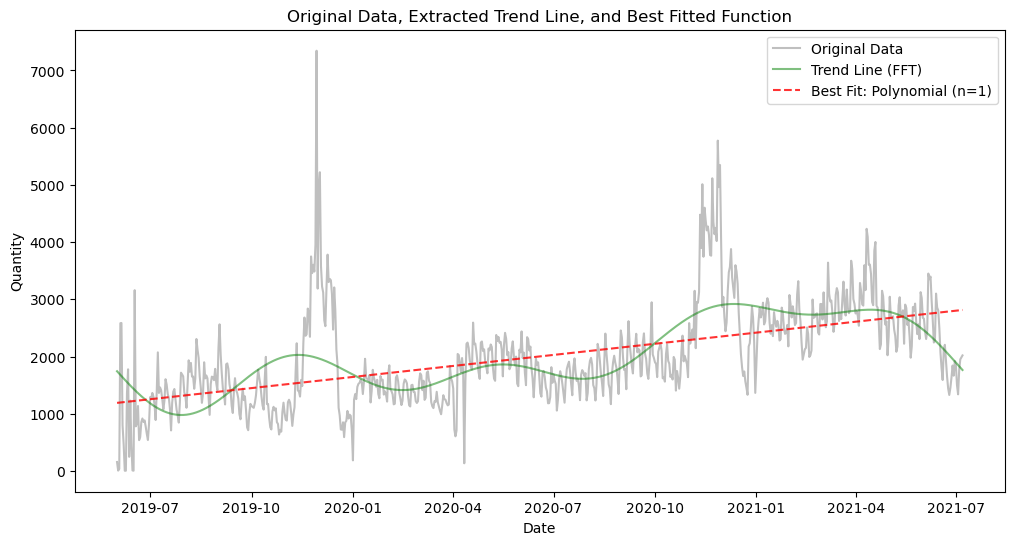

Best function: Polynomial (n=1)
MAE: 285.07754779810017, MRE: 0.1518303431093959



df_FE_diff['quantity'] is like this:


+---------------------+-------------+
|                     |    quantity |
|                     |     float64 |
|                     |      NaN: 0 |
|---------------------+-------------|
| 2019-06-01 00:00:00 | -1033.62    |
| 2019-06-02 00:00:00 | -1185.73    |
| 2019-06-03 00:00:00 | -1157.85    |
| 2019-06-04 00:00:00 |  1386.03    |
| 2019-06-05 00:00:00 |  1386.92    |
| 2019-06-06 00:00:00 |  -403.198   |
| 2019-06-07 00:00:00 |  -740.315   |
| 2019-06-08 00:00:00 | -1200.43    |
| 2019-06-09 00:00:00 | -1202.55    |
| 2019-06-10 00:00:00 |   147.336   |
| 2019-06-11 00:00:00 |   565.22    |
| 2019-06-12 00:00:00 |  -965.897   |
| 2019-06-13 00:00:00 |    13.9869  |
| 2019-06-14 00:00:00 |  -757.129   |
| 2019-06-15 00:00:00 | -1210.25    |
| 2019-06-16 00:00:00 | -1217.36    |
| 2019-06-17 00:00:00 |  1935.52    |
| 2019-06-18 00:00:00 |  -446.595   |
| 2

/Users/ds/miniconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/Users/ds/miniconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars

/var/folders/8z/sc6fjw1d6w1fhzfwfqd4rnwh0000gn/T/ipykernel_63922/4086267744.py:207: RuntimeWarning:

divide by zero encountered in divide

/var/folders/8z/sc6fjw1d6w1fhzfwfqd4rnwh0000gn/T/ipykernel_63922/4086267744.py:218: UserWarning:

Attempt to set non-positive xlim on a log-scaled axis will be ignored.



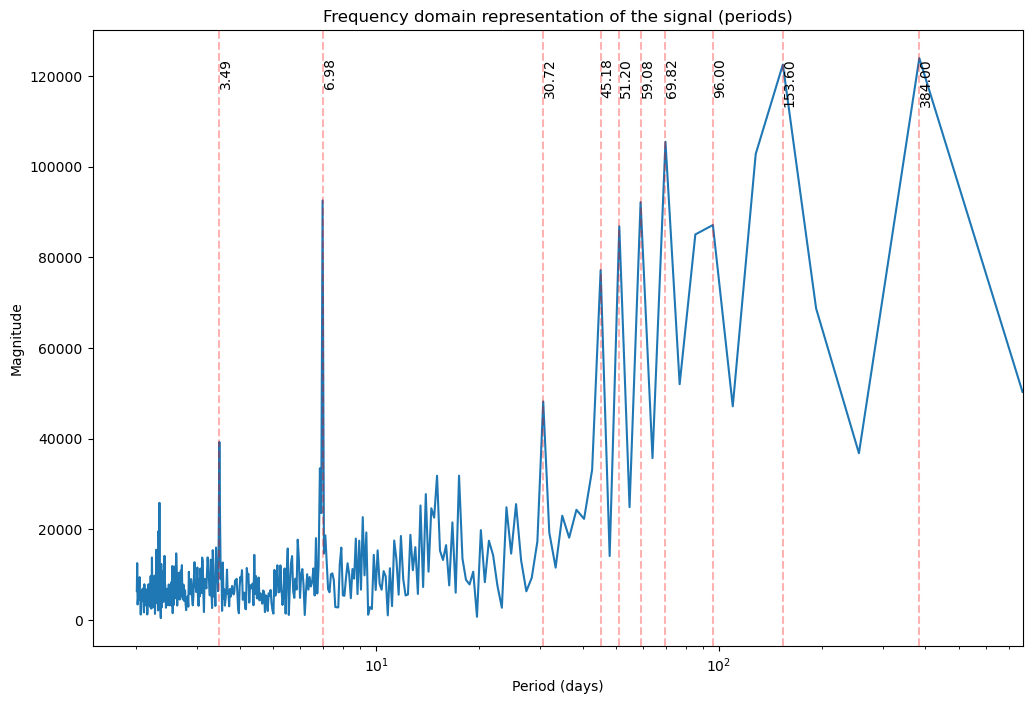

+---------------------+-------------+-----------------+-----------------+----------------+---------------+----------------+----------------+----------------+----------------+----------------+---------------+
|                     |    quantity |   period_384.00 |   period_153.60 |   period_69.82 |   period_6.98 |   period_59.08 |   period_96.00 |   period_51.20 |   period_45.18 |   period_30.72 |   period_3.49 |
|                     |     float64 |           int64 |           int64 |          int64 |         int64 |          int64 |          int64 |          int64 |          int64 |          int64 |         int64 |
|                     |      NaN: 0 |          NaN: 0 |          NaN: 0 |         NaN: 0 |        NaN: 0 |         NaN: 0 |         NaN: 0 |         NaN: 0 |         NaN: 0 |         NaN: 0 |        NaN: 0 |
|---------------------+-------------+-----------------+-----------------+----------------+---------------+----------------+----------------+----------------+-----------

(768, 11)

,quantity,period_384.00,period_153.60,period_69.82,period_6.98,period_59.08,period_96.00,period_51.20,period_45.18,period_30.72,period_3.49
2019-06-01,-1033.616172,1,1,1,1,1,1,1,1,1,1
2019-06-02,-1185.732581,2,2,2,2,2,2,2,2,2,2
2019-06-03,-1157.848991,3,3,3,3,3,3,3,3,3,3
2019-06-04,1386.034600,4,4,4,4,4,4,4,4,4,4
2019-06-05,1386.918191,5,5,5,5,5,5,5,5,5,2


,quantity,period_384.00,period_153.60,period_69.82,period_6.98,period_59.08,period_96.00,period_51.20,period_45.18,period_30.72,period_3.49
2021-07-03,-1465.436434,380,150,66,3,55,92,47,41,27,3
2021-07-04,-1040.552843,381,151,67,4,56,93,48,42,28,4
2021-07-05,-858.669253,382,152,68,5,57,94,49,43,29,1
2021-07-06,-827.785662,383,153,69,6,58,95,50,44,30,2
2021-07-07,-793.902071,384,154,70,7,59,96,51,45,31,3


(959, 1)

,quantity
2019-06-01,1190.616172
2019-06-02,1192.732581
2019-06-03,1194.848991
2019-06-04,1196.965400
2019-06-05,1199.081809


,quantity
2022-01-10,3209.670602
2022-01-11,3211.787011
2022-01-12,3213.903421
2022-01-13,3216.019830
2022-01-14,3218.136239


In [56]:
def auto_seasonality(df,truncate_date = '2021-07-07', predict_end_date='2022-01-14', trend_cycle_days=183, N=20):
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit

    # Define a function to fit a polynomial
    def polynomial_func1(x, x0, a, b):
        return a * (x - x0) ** 1 + b

    # Define a function to fit a polynomial
    def polynomial_func2(x, x0, a, b, c):
        return a * (x - x0) ** 2 + b * (x - x0) + c

    # Define the exponential function y = a*e^(b*(x-x0))+c
    def exponential_func(x, x0, a, b, c):
        return a * np.exp(b * (x - x0)) + c

    # Define a function to calculate MAE and MRE
    def calculate_errors(true_values, predicted_values):
        abs_errors = np.abs(true_values - predicted_values)
        mae = np.mean(abs_errors)
        mre = np.mean(abs_errors / true_values)
        return mae, mre

    # truncate_date = '2021-07-07'

    df_fft = df[df.index < truncate_date]


    # Apply FFT to the signal
    fft_coefficients = np.fft.fft(df_fft.quantity.values)

    # Define the frequency cutoff for the low-pass filter (keep frequencies below the cutoff)
    cutoff = 1 / trend_cycle_days

    # Create a mask for frequencies below the cutoff
    frequencies = np.fft.fftfreq(len(df_fft))
    mask = np.abs(frequencies) <= cutoff

    # Filter out the high frequencies (only keep the low frequencies)
    filtered_fft_coefficients = fft_coefficients * mask

    # Apply the inverse FFT to obtain the trend line
    trend_line = np.fft.ifft(filtered_fft_coefficients).real

    # Fit the polynomial functions (n=1, 2) and the exponential function
    x_values = np.arange(len(trend_line))

    polynomial_params1, _ = curve_fit(polynomial_func1, x_values, trend_line)
    polynomial_fit1 = polynomial_func1(x_values, *polynomial_params1)

    try:
        polynomial_params2, _ = curve_fit(polynomial_func2, x_values, trend_line, maxfev=2000)
        polynomial_fit2 = polynomial_func2(x_values, *polynomial_params2)
    except RuntimeError:
        print("Unable to fit the 2nd-degree polynomial function.")
        polynomial_fit2 = None

    try:
        exponential_params, _ = curve_fit(exponential_func, x_values, trend_line, p0=[x_values[0], 1, 0.001, 0], maxfev=2000)
        exponential_fit = exponential_func(x_values, *exponential_params)
    except RuntimeError:
        print("Unable to fit the exponential function.")
        exponential_fit = None

    # Calculate errors for each fitted function
    errors = {}
    if polynomial_fit1 is not None:
        print("Polynomial (n=1) parameters:", polynomial_params1)
        errors['Polynomial (n=1)'] = calculate_errors(trend_line, polynomial_fit1)
    if polynomial_fit2 is not None:
        print("Polynomial (n=2) parameters:", polynomial_params2)
        errors['Polynomial (n=2)'] = calculate_errors(trend_line, polynomial_fit2)
    if exponential_fit is not None:
        print("Exponential parameters:", exponential_params)
        errors['Exponential'] = calculate_errors(trend_line, exponential_fit)

    # Find the function with the lowest MAE
    best_function = min(errors, key=lambda k: errors[k][0])

    # Plot the best function
    _ = plt.figure(figsize=(12, 6))
    _ = plt.plot(df_fft.index, df_fft.quantity, color='grey', alpha=0.5, label='Original Data')
    _ = plt.plot(df_fft.index, trend_line, label='Trend Line (FFT)', color='green', alpha=0.5)

    if best_function == 'Polynomial (n=1)':
        _ = plt.plot(df_fft.index, polynomial_fit1, label='Best Fit: Polynomial (n=1)', color='red', alpha=0.8, linestyle='--')
    elif best_function == 'Polynomial (n=2)':
        _ = plt.plot(df_fft.index, polynomial_fit2, label='Best Fit: Polynomial (n=2)', color='red', alpha=0.8, linestyle='--')
    else:
        _ = plt.plot(df_fft.index, exponential_fit, label='Best Fit: Exponential', color='red', alpha=0.8, linestyle='--')

    _ = plt.xlabel('Date')
    _ = plt.ylabel('Quantity')
    _ = plt.title('Original Data, Extracted Trend Line, and Best Fitted Function')
    _ = plt.legend()
    _ = plt.show()

    print(f"Best function: {best_function}")
    print(f"MAE: {errors[best_function][0]}, MRE: {errors[best_function][1]}")




    df_FE_diff = df_fft.copy()
    # # please make new feature, which is the difference between the original date and the best fitted trend line

    # # Get the best fitted trend line
    # if best_function == 'Polynomial (n=1)':
    #     best_fit = polynomial_fit1
    # elif best_function == 'Polynomial (n=2)':
    #     best_fit = polynomial_fit2
    # else:
    #     best_fit = exponential_fit

    # # Calculate the difference between the original data and the best fitted trend line
    # difference = df_FE_diff.quantity.values - best_fit

    # # Add the difference as a new column in the DataFrame
    # df_FE_diff['quantity'] = difference

    # Create df_trend DataFrame with the same index as df but only until predict_end_date
    df_trend = pd.DataFrame(index=pd.date_range(df_fft.index[0], predict_end_date), columns=['quantity'])
    # print(df_trend.shape)
    # # Add the best fitted trend line as a new column in the DataFrame
    # df_trend['quantity']= best_fit



    # Get the extended x_values for the best_fit_extended
    extended_x_values = np.arange(len(df_trend.index))

    # Calculate the best_fit_extended using the best_function parameters
    if best_function == 'Polynomial (n=1)':
        best_fit_extended = polynomial_func1(extended_x_values, *polynomial_params1)
    elif best_function == 'Polynomial (n=2)':
        best_fit_extended = polynomial_func2(extended_x_values, *polynomial_params2)
    else:
        best_fit_extended = exponential_func(extended_x_values, *exponential_params)

    # Add the best_fit_extended as a new column in the df_trend DataFrame
    df_trend['quantity'] = best_fit_extended

    # Calculate the difference between the original data and the best_fit (up to the length of df_fft.index)
    difference = df_FE_diff.quantity.values - best_fit_extended[:len(df_fft.index)]

    # Add the difference as a new column in the df_FE_diff DataFrame
    df_FE_diff['quantity'] = difference


    # Display the updated DataFrame
    print("\n\n\ndf_FE_diff['quantity'] is like this:\n\n")
    dc.print_df_with_dtypes(df_FE_diff, max_rows=200, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_quantity_sum_df')
    # convert quantity column to from time domain to frequency domain using FFT, and plot it. frequency range should be corresponding to 1 to 365.

    import numpy as np
    import matplotlib.pyplot as plt

    # Apply the Fast Fourier Transform (FFT) to the quantity column
    quantity_fft = np.fft.fft(df_FE_diff['quantity'])

    # Get the frequency corresponding to each FFT coefficient
    sample_frequency = np.fft.fftfreq(df_FE_diff.shape[0])

    # Calculate the magnitude of the FFT coefficients
    fft_magnitude = np.abs(quantity_fft)


    from scipy.signal import find_peaks

    # Find the peaks in the magnitude array
    peaks, _ = find_peaks(fft_magnitude)

    # Sort the peaks by magnitude in descending order and take the top N peaks
    # N = 20
    top_peaks = sorted(peaks, key=lambda i: fft_magnitude[i], reverse=True)[:N]

    # Get the central frequencies corresponding to the top peaks
    central_frequencies = sample_frequency[top_peaks]

    # Filter out the negative frequencies and calculate the corresponding periods
    positive_frequencies = central_frequencies[central_frequencies > 0]
    corresponding_periods = 1 / positive_frequencies

    # Sort periods by energy concentration in descending order
    sorted_periods = sorted(corresponding_periods, key=lambda p: np.mean(fft_magnitude[sample_frequency == 1 / p]), reverse=True)

    # Print the periods with the most energy concentration
    print("Periods with most energy concentration:", sorted_periods)

    # Plot the FFT magnitudes with x-axis labeled as periods
    _ = plt.figure(figsize=(12, 8))
    _ = plt.plot(1 / sample_frequency[:len(sample_frequency) // 2], fft_magnitude[:len(fft_magnitude) // 2])
    _ = plt.xlabel("Period (days)")
    _ = plt.ylabel("Magnitude")
    _ = plt.title("Frequency domain representation of the signal (periods)")
    _ = plt.xscale("log")

    # Highlight the periods with the most energy concentration and add vertical annotations
    for period in sorted_periods:
        _ = plt.axvline(x=period, color='r', alpha=0.3, linestyle='--')
        _ = plt.annotate(f"{period:.2f}", xy=(period, max(fft_magnitude[:len(fft_magnitude) // 2]) * 0.5), xytext=(period, max(fft_magnitude[:len(fft_magnitude) // 2])), rotation='vertical', fontsize=10, va='top', textcoords='data')

    _ = plt.xlim(1 / sample_frequency[len(sample_frequency) // 2], 1 / sample_frequency[1])  # Set the x-axis limits to exclude 0 frequency
    _ = plt.show()

    sorted_periods
    # Calculate day_number for each row in the DataFrame
    df_FE_diff['day_number'] = (df_FE_diff.index - df_FE_diff.index[0]).days

    # Create new features based on the sorted_periods
    for i, period in enumerate(sorted_periods):
        feature_name = f"period_{period:.2f}"
        df_FE_diff[feature_name] = df_FE_diff['day_number'].apply(lambda x: int(round(x % period +1)))

    # dc.print_df_with_dtypes(df_FE_diff, max_rows=200, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_quantity_sum_df')
    
    # drop the day_number column from df_FE_diff
    df_FE_diff.drop(columns=['day_number'], inplace=True)
    
    return df_FE_diff, df_trend

df_FE_diff, df_trend = auto_seasonality(df_FE_1a_daily_fill, truncate_date = '2021-07-08', predict_end_date='2022-01-14', trend_cycle_days=183, N=20)

dc.print_df_with_dtypes(df_FE_diff, max_rows=200, print_on=True, data_generated_path=DATA_GENERATED_PATH, name_extension='EDA_quantity_sum_df')

df_FE_diff.shape
df_FE_diff.head()
df_FE_diff.tail()

df_trend.shape

df_trend.head()
df_trend.tail()


In [57]:
# save df_FE_1a_daily_fill, df_FE_diff and df_trend to csv files

df_FE_diff.to_csv(DATA_GENERATED_PATH + 'df_FE_diff.csv', index=True)
df_trend.to_csv(DATA_GENERATED_PATH + 'df_trend.csv', index=True)
df_FE_1a_daily_fill.to_csv(DATA_GENERATED_PATH + 'df_FE_1a_daily_fill.csv', index=True)

----
